# 利用卷积神经网络对CIFAR数据集进行图像分类
* 学习使用深度学习框架，包括但不限于：tensorflow,pytorch
* 练习使用卷积神经网络做图像分类，写明必要code的注释。
* 结果展示为：
* 1. 构建数据集，搭建模型。
* 2.模型训练和模型测试，需要在测试集合上测试所训练模型的准确度。画出训练中的loss变化曲线，展示出测试集合的分类准确度，并说明训练的超参数取值。
* 3. 模型展示。需要输入一张测试集图片判断输入什么类别；图片显示并将预测结果打印。

# 参考答案

## 导入依赖

In [1]:
# 导入所需的依赖包
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import cv2
from PIL import Image
import numpy as np

## 模型搭建

In [2]:
# 搭建模型
class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet, self).__init__()
        # Conv2d的第一个参数是输入的channel数量，第二个是输出的channel数量，第三个是kernel size
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 由于上一层有16个channel输出，每个feature map大小为5*5，所以全连接层的输入是16*5*5
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        # 最终有10类，所以最后一个全连接层输出数量是10
        self.fc3 = nn.Linear(84, 10)
        self.pool = nn.MaxPool2d(2, 2)
    # forward这个函数定义了前向传播的运算，只需要像写普通的python算数运算那样就可以了
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        # 下面这步把二维特征图变为一维，这样全连接层才能处理
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 数据集获取

In [3]:
# 获取数据集
data_path = 'data'
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
cifar_train = torchvision.datasets.CIFAR10(root=data_path, train=True,download=False, transform=transform)
cifar_test  = torchvision.datasets.CIFAR10(root=data_path, train=False,download=False, transform=transform)
print("数据集描述信息：")
print(cifar_train)
print(cifar_test)

数据集描述信息：
Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: data
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None
Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: data
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None


In [4]:
# 加载数据集
batch_size = 32
trainloader = torch.utils.data.DataLoader(cifar_train, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(cifar_test, batch_size=batch_size, shuffle=False)

## 定义损失函数和学习率

In [5]:
# 定义交叉熵损失函数和初始化模型
model = CNNNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) #这里设置优化器和学习率

## 模型训练

In [6]:
epochs = 30 #设置训epoch
save_path = "cifar10_epoch{}.pth.tar".format(epoch)
print("Start Training...")
loss_list = []#记录每个epoch的损失值
for epoch in range(epochs):
    # 变量来记录每epoch的平均loss,acc
    losss = 0.0
    accc = 0.0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        _, pred = torch.max(outputs.view(-1, 10), 1)
        acc = float((pred == labels).long().sum()) / labels.size(0)
        loss.backward()
        optimizer.step()
        losss += loss.item()
        accc += acc
        print('[Epoch %d] loss: %.3f acc:  %.3f ' % (epoch + 1, losss / (i+1), accc / (i+1)))
    loss_list.append(losss/(i+1))
# 保存模型参数
torch.save(model.state_dict(), save_path)
print("Done Training!")

Start Training...
[Epoch 1] loss: 2.320 acc:  0.062 
[Epoch 1] loss: 2.309 acc:  0.062 
[Epoch 1] loss: 2.310 acc:  0.094 
[Epoch 1] loss: 2.312 acc:  0.086 
[Epoch 1] loss: 2.311 acc:  0.075 
[Epoch 1] loss: 2.308 acc:  0.078 
[Epoch 1] loss: 2.308 acc:  0.071 
[Epoch 1] loss: 2.309 acc:  0.074 
[Epoch 1] loss: 2.310 acc:  0.073 
[Epoch 1] loss: 2.311 acc:  0.072 
[Epoch 1] loss: 2.309 acc:  0.074 
[Epoch 1] loss: 2.308 acc:  0.076 
[Epoch 1] loss: 2.307 acc:  0.082 
[Epoch 1] loss: 2.307 acc:  0.085 
[Epoch 1] loss: 2.307 acc:  0.083 
[Epoch 1] loss: 2.306 acc:  0.088 
[Epoch 1] loss: 2.306 acc:  0.086 
[Epoch 1] loss: 2.305 acc:  0.085 
[Epoch 1] loss: 2.305 acc:  0.086 
[Epoch 1] loss: 2.305 acc:  0.086 
[Epoch 1] loss: 2.304 acc:  0.089 
[Epoch 1] loss: 2.303 acc:  0.097 
[Epoch 1] loss: 2.304 acc:  0.092 
[Epoch 1] loss: 2.304 acc:  0.094 
[Epoch 1] loss: 2.303 acc:  0.094 
[Epoch 1] loss: 2.303 acc:  0.095 
[Epoch 1] loss: 2.303 acc:  0.095 
[Epoch 1] loss: 2.303 acc:  0.094 
[E

## 训练时loss变化曲线

Text(0.5, 1.0, 'loss curve, lr is 0.01, epoch is 30')

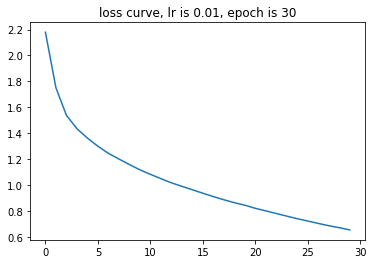

In [11]:
x = np.arange(epochs)
y = np.array(loss_list)
plt.plot(x, y)
plt.title("loss curve, lr is 0.01, epoch is {}".format(epochs))

## 在测试集上准确率

In [12]:
model_weight = torch.load(save_path)
model.load_state_dict(model_weight)
# 构造测试的dataloader
dataiter = iter(testloader)
# 预测正确的数量和总数量
correct = 0
total = 0
with torch.no_grad():
    for images, labels in dataiter:
        outputs = model(images)
        # 用最大概率的一项作为预测分类
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of 10000 test images: %d %%' % (100 * correct / total))

Accuracy of 10000 test images: 65 %


## 模型展示 

标签是：frog 图片如下：


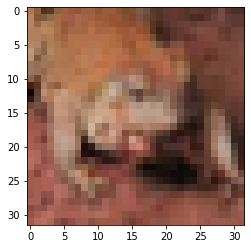

预测结果是：frog


In [17]:
idx = 5 #随机取测试集一张图片
data = cifar_test.data[idx]#获取测试集的一张图片
t = cifar_test.targets[idx]#获取标签
t = cifar_test.classes[t]
print("标签是：{} 图片如下：".format(t))
plt.imshow(data)#展示图片
plt.show()
data = transform(data).unsqueeze(0)#对原始数据转化
outputs = model(data)#进行模型预测
_, pred = torch.max(outputs.data, 1)#取预测概率最大值
pred = cifar_test.classes[pred.item()]#查看预测的类别名称
print("预测结果是：{}".format(pred))